Here’s an example of a simple linear regression scenario related to air pollution:

**Scenario:**
You want to study the relationship between the number of vehicles on the road and the level of air pollution (measured in PM2.5 concentration). You collect real-world data from a city over several days.

**Table of Data:**

| Number of Vehicles (in thousands) | PM2.5 Concentration (µg/m³) |
|-----------------------------------|-----------------------------|
| 10                                | 25                          |
| 20                                | 40                          |
| 30                                | 55                          |
| 40                                | 70                          |
| 50                                | 85                          |

**Objective:**
Using this data, you aim to build a simple linear regression model to predict PM2.5 concentration based on the number of vehicles on the road.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize the data
vehicles = [10, 20, 30, 40, 50]
pm25 = [25, 40, 55, 70, 85]
# Print the data
print("Number of Vehicles:", vehicles)
print("PM2.5 Concentration:", pm25)
#add some noise to the data
import numpy as np
noise = np.random.normal(0, 15, len(pm25))
print("5 random noise values (mean 0, std dev 15):\n", noise)

pm25 = [p + n for p, n in zip(pm25, noise)]
# Print the data with noise added
print("Number of Vehicles:", vehicles)
print("PM2.5 Concentration with noise added:", pm25)


Number of Vehicles: [10, 20, 30, 40, 50]
PM2.5 Concentration: [25, 40, 55, 70, 85]
5 random noise values (mean 0, std dev 15):
 [-15.300791    -2.86632158  15.10046056   4.82152408 -28.74715351]
Number of Vehicles: [10, 20, 30, 40, 50]
PM2.5 Concentration with noise added: [9.699209002124897, 37.13367841995646, 70.10046056066203, 74.82152408490573, 56.252846492021604]


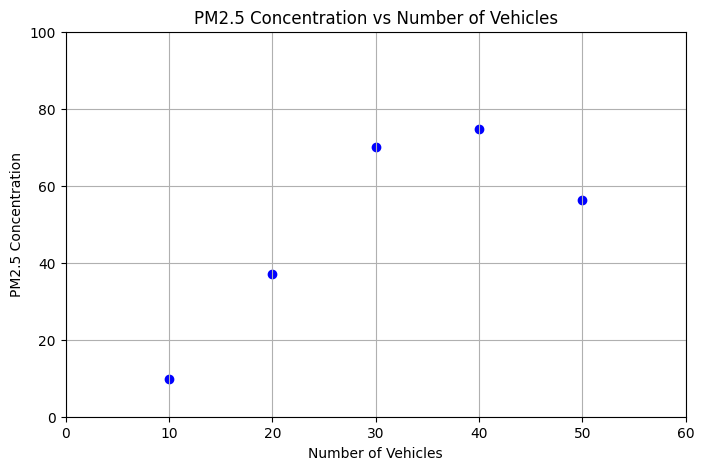

In [2]:

# Visualize the data , using a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(vehicles, pm25, marker='o', color='blue')
plt.xlabel('Number of Vehicles')    
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs Number of Vehicles')
plt.xlim(0, 60)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Reshape the vehicles data into a 2D array as required by sklearn
X = np.array(vehicles).reshape(-1, 1)
#  The reshape method is used to change the shape of the resulting array.for plotting.
#  The -1 indicates that the number of rows should be inferred automatically
#  based on the length of the array, and 1 indicates that there should be one column.
#  The resulting array will have the shape (n_samples, n_features), where n_samples is 
# the number of elements in the original array.



y = np.array(pm25)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

Intercept: 10.363007518511331
slope: 1.307951206447427


This line of code performs two key operations: converting a list or similar data structure into a NumPy array and reshaping it into a specific format. Let’s break it down step by step:

1. **`np.array(vehicles)`**:  
   The `np.array()` function is used to create a NumPy array from the `vehicles` object. The `vehicles` variable is likely a list, tuple, or another iterable containing data. Converting it into a NumPy array allows you to leverage the powerful numerical and matrix operations provided by the NumPy library. NumPy arrays are more efficient for numerical computations compared to Python lists because they are stored in contiguous memory and support vectorized operations.

2. **`.reshape(-1, 1)`**:  
   After creating the NumPy array, the `.reshape()` method is called to change its shape. The argument `(-1, 1)` specifies that the array should have one column (`1`) and as many rows as needed (`-1`). The `-1` is a placeholder that tells NumPy to automatically calculate the number of rows based on the size of the original array. This is particularly useful when preparing data for machine learning models, as many algorithms expect input features to be in a 2D array format (rows representing samples and columns representing features).

### Why is this important?
This transformation is common in machine learning workflows. If `vehicles` is a 1D array (e.g., `[1, 2, 3, 4]`), reshaping it to `(-1, 1)` converts it into a 2D array like `[[1], [2], [3], [4]]`. This ensures compatibility with algorithms that require input data to have a specific dimensionality, such as scikit-learn's linear regression models.

### Potential Gotchas:
- If `vehicles` is not a valid iterable or contains incompatible data types, `np.array()` will raise an error.
- The `.reshape()` method assumes the total number of elements remains constant. If the size of the original array cannot be reshaped into the specified dimensions, it will raise a `ValueError`.

This line is a concise and efficient way to prepare data for further processing, particularly in machine learning or data analysis tasks.

visualize the fitted line 
plt.plot(vehicles, y_pred):
The plot function is used to create a line plot in Matplotlib, it  requires two arguments: vehicles (the x-axis values) and y_pred (the y-axis values). These represent the independent variable (number of vehicles) and the predicted dependent variable (PM2.5 concentration), respectively. The function plots these points as a continuous line, which is ideal for visualizing the relationship modeled by the linear regression. 

Text(0, 0.5, 'PM2.5 Concentration')

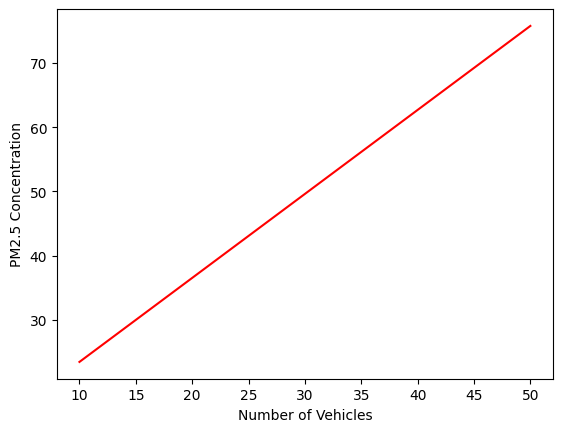

In [8]:
# Generate predictions using the fitted model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(vehicles, y_pred, color='red', label='Fitted Line')


plt.xlabel('Number of Vehicles')
plt.ylabel('PM2.5 Concentration')


compute the error between the predicted and actual training data. This error can be used to measure the accuracy of the model.

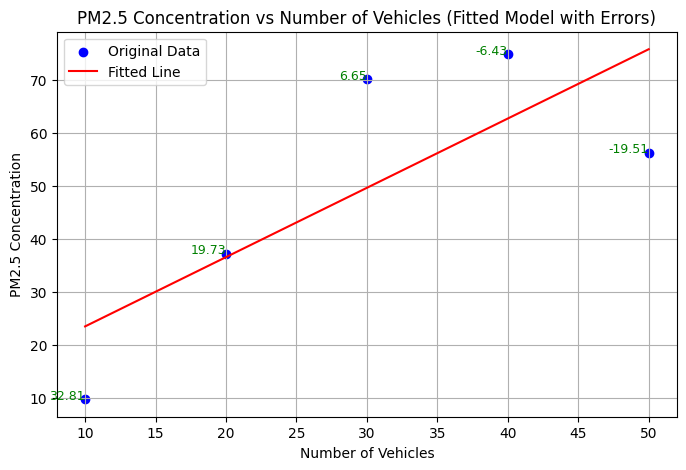

In [11]:
# Calculate the error at each data point
errors = y - y_pred

# Plot the original data points
plt.figure(figsize=(8, 5))
plt.scatter(vehicles, pm25, marker='o', color='blue', label='Original Data')

# Plot the regression line
plt.plot(vehicles, y_pred, color='red', label='Fitted Line')

# Annotate the error at each data point
for i, (x, y, e) in enumerate(zip(vehicles, pm25, errors)):
    plt.text(x, y, f"{e:.2f}", fontsize=9, color='green', ha='right')

# Add labels, title, and legend
plt.xlabel('Number of Vehicles')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs Number of Vehicles (Fitted Model with Errors)')
plt.legend()
plt.grid(True)
plt.show()

compute ssr , rss and r2 of the model to evaluate the performance of the model

In [10]:
# Generate predictions using the fitted model
y_pred = model.predict(X)

# Calculate SSR (Sum of Squares due to Regression)
y_mean = np.mean(y)
ssr = np.sum((y_pred - y_mean) ** 2)

# Calculate RSS (Residual Sum of Squares)
rss = np.sum((y - y_pred) ** 2)

# Calculate TSS (Total Sum of Squares)
tss = np.sum((y - y_mean) ** 2)

# Calculate R² (Coefficient of Determination)
r2 = ssr / tss

# Print the results
print(f"SSR (Sum of Squares due to Regression): {ssr}")
print(f"RSS (Residual Sum of Squares): {rss}")
print(f"R² (Coefficient of Determination): {r2}")

SSR (Sum of Squares due to Regression): 1931.935501809276
RSS (Residual Sum of Squares): 1931.935501809276
R² (Coefficient of Determination): inf


C:\Users\husph\AppData\Local\Temp\ipykernel_6500\1834261322.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = ssr / tss
